# Analysis and Clustering of Spanish Wines

A beautiful country located on the Iberian Peninsula- Spain is worldly known for its wineries and excellent wines. In this project, I applied Data Analysis, visualizations tools, and a Clustering Model to better understand the wine story that began thousands of years ago.

The dataset includes 7500 entries on wines from all around Spain. We have acces to such variables like winery, wine, year, number of reviews, region, price, type, body and acidity.

In this Data Science project, I want to investigate correlations between the variables and build a Clustering Model that allows for grouping wines based on individual characteristics.

## Preliminary Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wines = pd.read_csv("wines_SPA.csv")

In [3]:
 wines

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [4]:
missing_count=wines.isnull().sum()
missing_percentage = (missing_count / len(wines)) * 100
column_type= wines.dtypes
unique_data=wines.nunique()

missing_data = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage, "Data Type" : column_type}).sort_values(by='Missing Count', ascending=True)

print(missing_data)

             Missing Count  Missing Percentage Data Type
winery                   0            0.000000    object
wine                     0            0.000000    object
rating                   0            0.000000   float64
num_reviews              0            0.000000     int64
country                  0            0.000000    object
region                   0            0.000000    object
price                    0            0.000000   float64
year                     2            0.026667    object
type                   545            7.266667    object
body                  1169           15.586667   float64
acidity               1169           15.586667   float64


In [5]:
wines.nunique()

winery          480
wine            847
year             71
rating            8
num_reviews     817
country           1
region           76
price          1292
type             21
body              4
acidity           3
dtype: int64

**Data Visualizations**

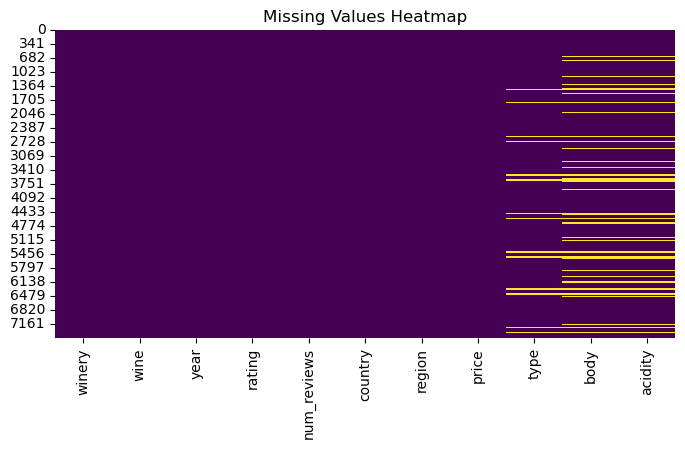

In [6]:
plt.figure(figsize=(8, 4))
sns.heatmap(wines.isnull(), cbar=False, cmap='viridis')

plt.title('Missing Values Heatmap')
plt.show()

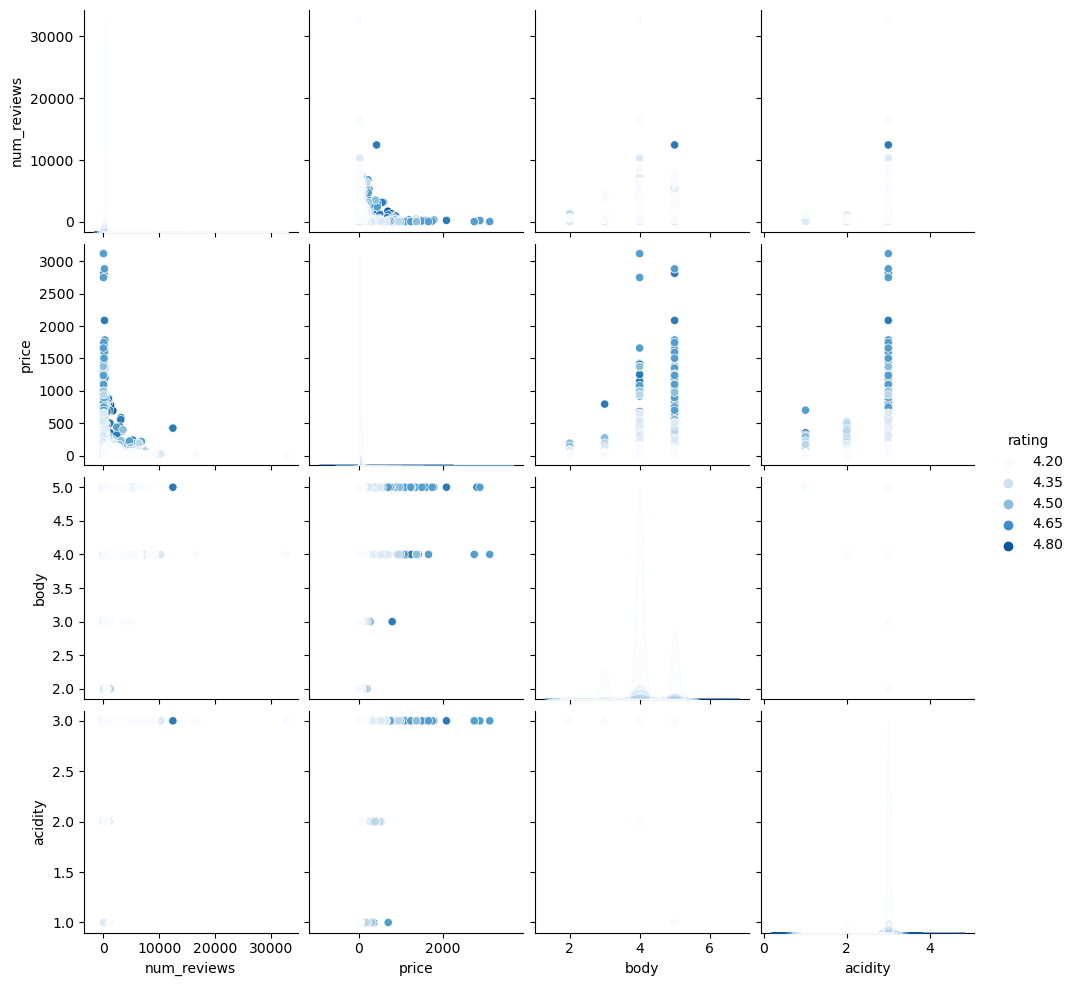

In [7]:
sns.pairplot(wines, hue="rating", palette='Blues')

Text(0.5, 1.0, 'Correlation Heatmap')

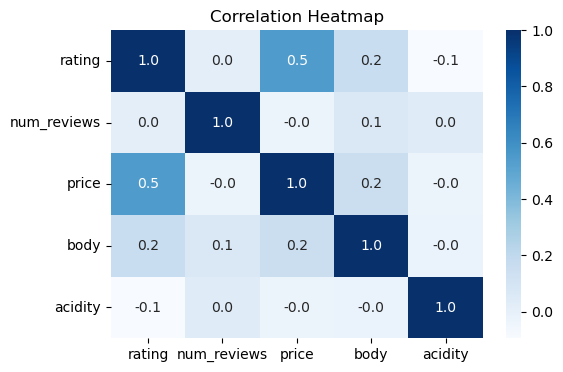

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(wines.corr(numeric_only=True),annot=True, cmap='Blues', fmt='.1f')
plt.title('Correlation Heatmap')


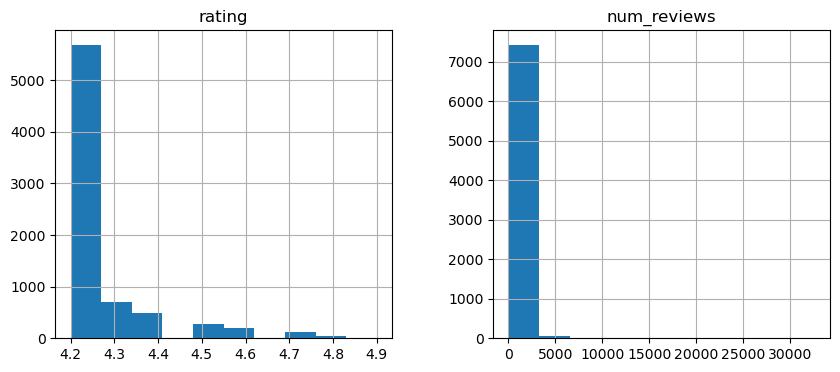

In [9]:
features = ["rating", "num_reviews"]
wines[features].hist(figsize=(10, 4));

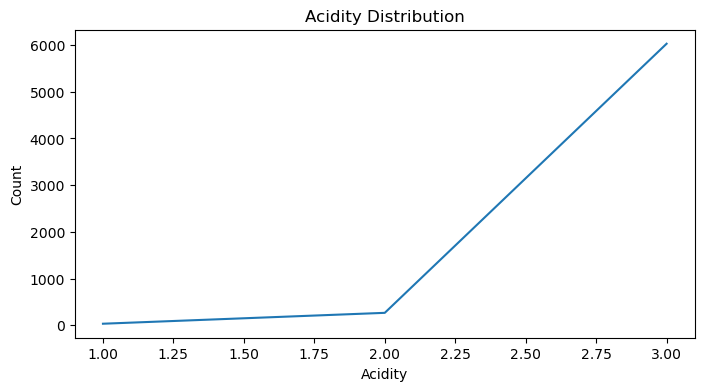

In [10]:
count_acid = wines['acidity'].value_counts()
plt.figure(figsize=(8, 4))
plt.plot(count_acid.index, count_acid.values)
plt.xlabel('Acidity')
plt.ylabel('Count')
plt.title(f'Acidity Distribution')
plt.show()

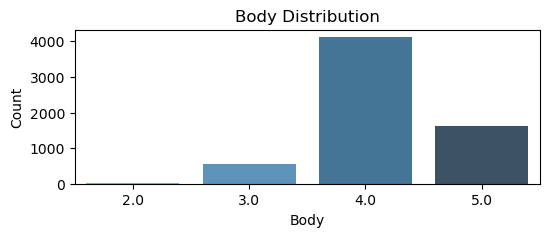

In [11]:
body_counts = wines['body'].value_counts()


plt.figure(figsize=(6, 2))
sns.barplot(x=body_counts.index, y=body_counts,palette='Blues_d' )
plt.xlabel('Body')
plt.ylabel('Count')
plt.title(f'Body Distribution')
plt.show()

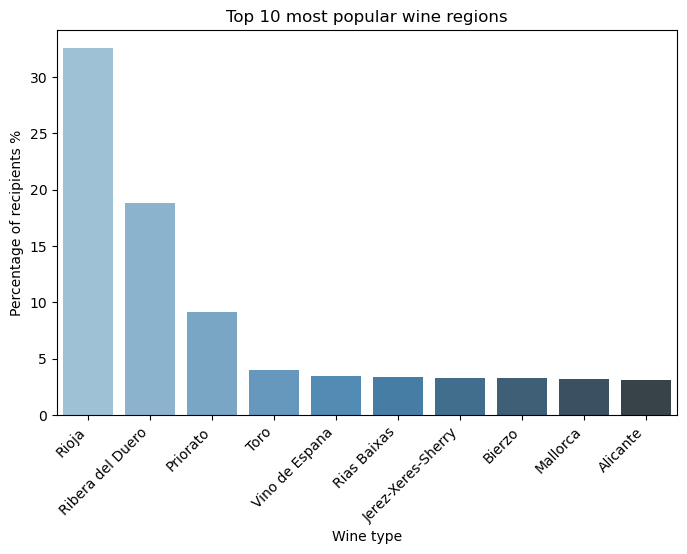

In [12]:

top_n = 10 
top_n_wines = wines['region'].value_counts().head(top_n)
top_n_wines_perc= 100* top_n_wines /len(wines)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_n_wines_perc.index, y=top_n_wines_perc, palette='Blues_d')
plt.xlabel('Wine type')
plt.ylabel('Percentage of recipients %')
plt.title(f'Top {top_n} most popular wine regions')
plt.xticks(rotation=45, ha='right')
plt.show()

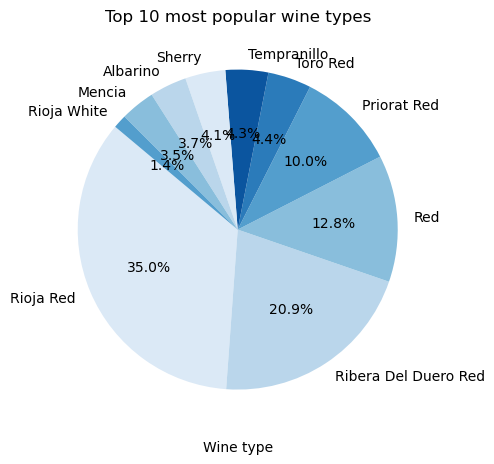

In [13]:

top_n = 10 
top_n_wines = wines['type'].value_counts().head(top_n)
top_n_wines_perc= 100* top_n_wines /len(wines)

plt.figure(figsize=(8, 5))
plt.pie(x=top_n_wines_perc, labels=top_n_wines_perc.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues'))
plt.xlabel('Wine type')
plt.title(f'Top {top_n} most popular wine types')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.2)

plt.show()

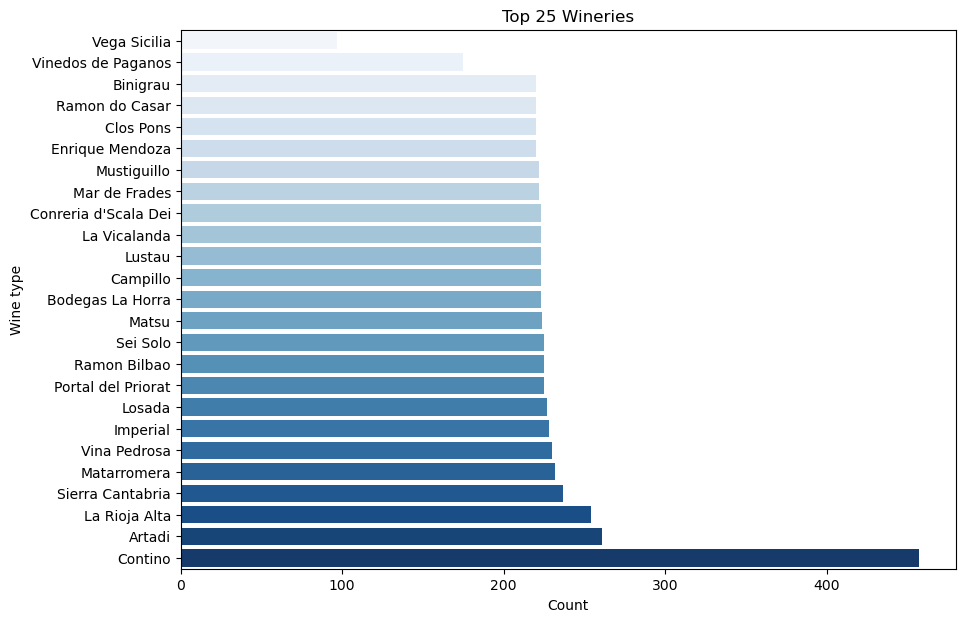

In [14]:
top_n = 25

top_n_wineries = wines['winery'].value_counts().head(top_n)
top_n_wineries = top_n_wineries.sort_values()

plt.figure(figsize=(10, 7))
sns.barplot(x=top_n_wineries, y=top_n_wineries.index, palette='Blues')  # Swap x and y
plt.xlabel('Count')
plt.ylabel('Wine type')
plt.title(f'Top {top_n} Wineries')

plt.show()


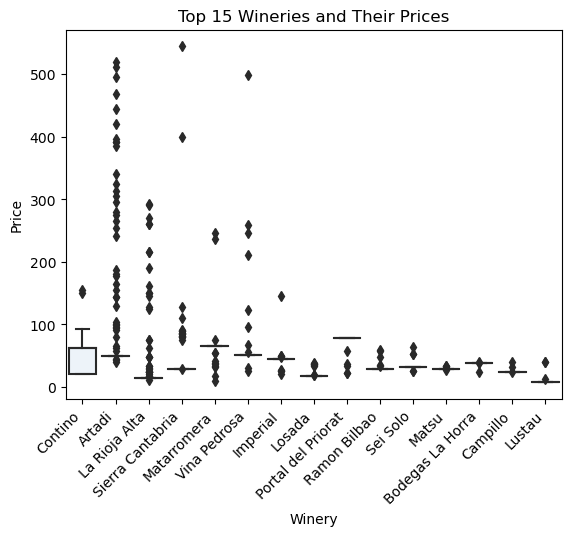

In [15]:
#Price Distribution in the top wineries
top_n = 15

top_n_wineries = wines['winery'].value_counts().head(top_n)
sns.boxplot(x=wines['winery'], y=wines['price'], order=top_n_wineries.index, palette='Blues')
plt.xticks(rotation=45, ha='right')

plt.xlabel('Winery')
plt.ylabel('Price')
plt.title(f'Top {top_n} Wineries and Their Prices')
plt.show()


Text(0.5, 1.0, 'Correlation of Rating and Price (€))')

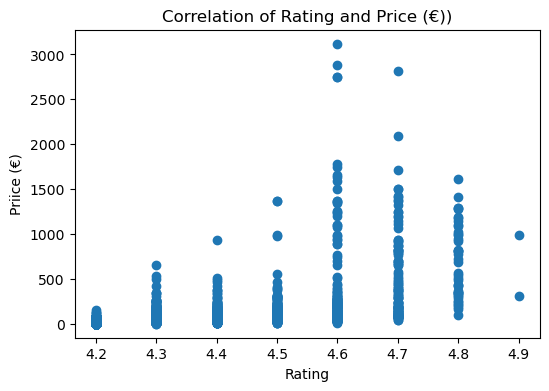

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(wines['rating'], wines['price']);
plt.xlabel('Rating')
plt.ylabel('Priice (€)')
plt.title('Correlation of Rating and Price (€))')

Text(0.5, 1.0, 'Correlation of Rating and Price')

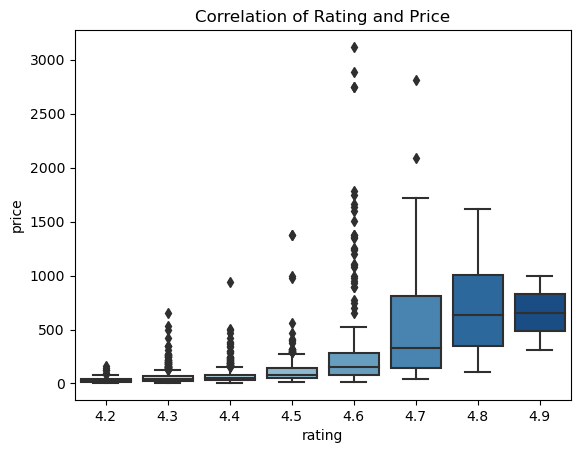

In [17]:
sns.boxplot(x=wines['rating'],y= wines['price'], palette='Blues')
plt.title('Correlation of Rating and Price')

Text(0.5, 1.0, 'Body ')

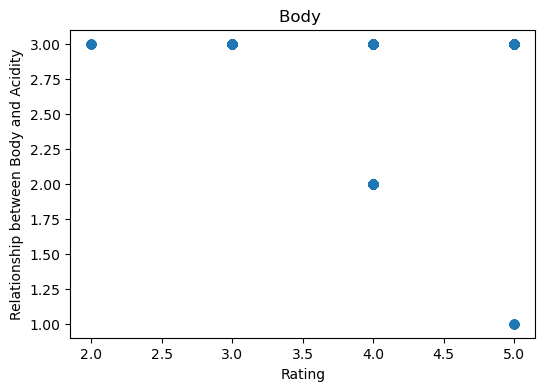

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(wines['body'], wines['acidity']);
plt.xlabel('Rating')
plt.ylabel('Relationship between Body and Acidity')
plt.title("Body ")

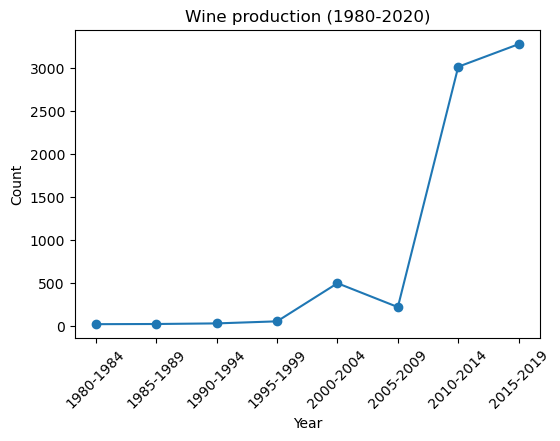

In [19]:
bins = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
wines['year'] = pd.to_numeric(wines['year'], errors='coerce')

wines['year_bins'] = pd.cut(wines['year'], bins=bins, labels=[f'{start}-{start+4}' for start in bins[:-1]])
count_acid = wines['year_bins'].value_counts().sort_index()  
plt.figure(figsize=(6, 4))
plt.plot(count_acid.index.astype(str), count_acid.values, marker='o')  
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Wine production (1980-2020)')
plt.xticks(rotation=45)
plt.show()


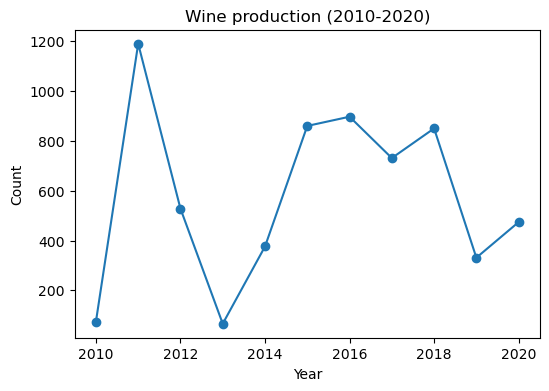

In [20]:
wines_2010_2020 = wines[wines['year'].between(2010,2020)]

count_year = wines_2010_2020['year'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.plot(count_year.index, count_year.values, marker='o')  
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Wine production (2010-2020)')

plt.show()

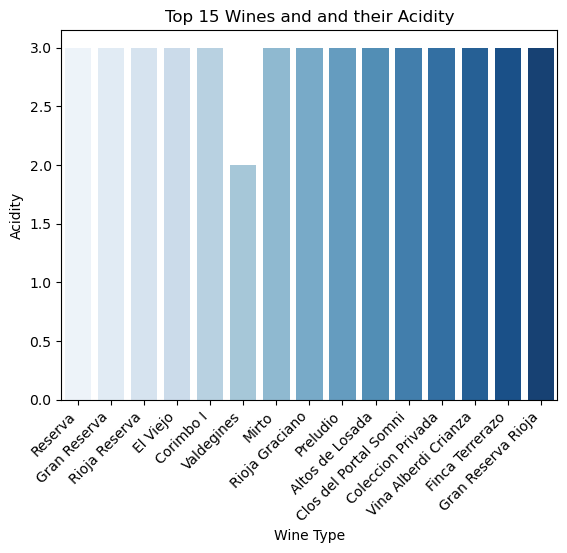

In [21]:
#Acidity and wine type
top_n = 15

top_n_wines = wines['wine'].value_counts().head(top_n)
sns.barplot(x=wines['wine'], y=wines['acidity'], order=top_n_wines.index, palette='Blues')
plt.xticks(rotation=45, ha='right')

plt.xlabel('Wine Type')
plt.ylabel('Acidity')
plt.title(f'Top {top_n} Wines and and their Acidity')
plt.show()


In [22]:
wines

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,year_bins
0,Teso La Monja,Tinto,2013.0,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,2010-2014
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,2015-2019
2,Vega Sicilia,Unico,2009.0,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,2005-2009
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,1995-1999
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,1995-1999
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016.0,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0,2015-2019
7496,Conreria d'Scala Dei,Les Brugueres,2018.0,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0,2015-2019
7497,Mustiguillo,Finca Terrerazo,2017.0,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0,2015-2019
7498,Matarromera,Gran Reserva,2011.0,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0,2010-2014


winery          480
wine            847
year             71
rating            8
num_reviews     817
country           1
region           76
price          1292
type             21
body              4
acidity           3

**Clustering the Data**

In [23]:
wines.dropna(inplace=True)

In [24]:
columns_to_drop = ['wine', 'winery', 'country', 'region', 'type', 'num_reviews', 'year_bins']
wines_dropped=wines[columns_to_drop]
wines_drop = wines.drop(columns=columns_to_drop)
wines_drop

,year,rating,price,body,acidity
0,2013.0,4.9,995.00,5.0,3.0
1,2018.0,4.9,313.50,4.0,2.0
2,2009.0,4.8,324.95,5.0,3.0
3,1999.0,4.8,692.96,5.0,3.0
4,1996.0,4.8,778.06,5.0,3.0
...,...,...,...,...,...
7495,2016.0,4.2,19.98,4.0,3.0
7496,2018.0,4.2,16.76,4.0,3.0
7497,2017.0,4.2,24.45,4.0,3.0
7498,2011.0,4.2,64.50,5.0,3.0


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn import set_config

# Output dataframes instead of arrays
set_config(transform_output="pandas")

preprocessor = make_column_transformer(
    (StandardScaler(), ['year', 'rating','price','body', 'acidity']),
    verbose_feature_names_out=False,
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['year', 'rating', 'price', 'body',
                                  'acidity'])],
                  verbose_feature_names_out=False)

In [26]:
wines

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,year_bins
0,Teso La Monja,Tinto,2013.0,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,2010-2014
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,2015-2019
2,Vega Sicilia,Unico,2009.0,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,2005-2009
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,1995-1999
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,1995-1999
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016.0,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0,2015-2019
7496,Conreria d'Scala Dei,Les Brugueres,2018.0,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0,2015-2019
7497,Mustiguillo,Finca Terrerazo,2017.0,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0,2015-2019
7498,Matarromera,Gran Reserva,2011.0,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0,2010-2014


In [27]:
wines_drop.dropna(inplace=True)


In [28]:
missing_count=wines_drop.isnull().sum()
missing_percentage = (missing_count / len(wines)) * 100
column_type= wines.dtypes
unique_data=wines.nunique()

missing_data = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage, "Data Type" : column_type}).sort_values(by='Missing Count', ascending=True)

print(missing_data)

             Missing Count  Missing Percentage Data Type
acidity                0.0                 0.0   float64
body                   0.0                 0.0   float64
price                  0.0                 0.0   float64
rating                 0.0                 0.0   float64
year                   0.0                 0.0   float64
country                NaN                 NaN    object
num_reviews            NaN                 NaN     int64
region                 NaN                 NaN    object
type                   NaN                 NaN    object
wine                   NaN                 NaN    object
winery                 NaN                 NaN    object
year_bins              NaN                 NaN  category


In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

ks = range(1, 20)
n_init_value = 10

wssds = [
    make_pipeline(
    	preprocessor,
    	KMeans(n_clusters=k, n_init= n_init_value )
  # Create a new KMeans model with `k` clusters
    ).fit(wines_drop)[1].inertia_
    for k in ks
]

wines_clust_ks = pd.DataFrame({
    "k": ks,
    "wssd": wssds,
})

wines_clust_ks

,k,wssd
0,1,30055.000000
1,2,23469.298655
2,3,17921.871486
3,4,13838.114365
4,5,10725.635520
5,6,8481.290165
6,7,6946.897741
7,8,6209.614220
8,9,5560.571296
9,10,5039.550454


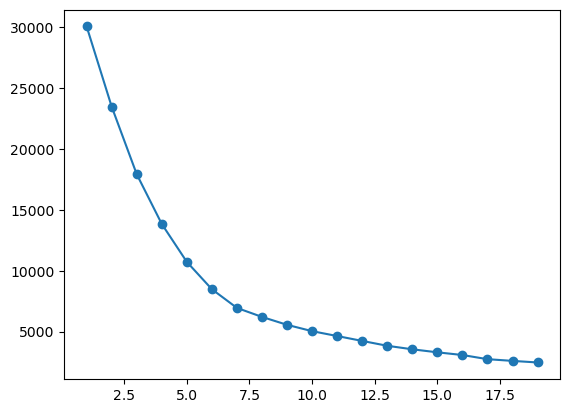

In [30]:
plt.plot(wines_clust_ks['k'], wines_clust_ks['wssd'], marker='o')

In [31]:
#based on a grpah wiht set the number of clusters= 6
num_clusters= 7
n_init_value = 10

kmeans = KMeans(n_clusters=num_clusters, n_init=n_init_value, random_state=42)
wines_drop['cluster'] = kmeans.fit_predict(wines_drop[['year', 'rating','price','body', 'acidity']])
wines_drop

,year,rating,price,body,acidity,cluster
0,2013.0,4.9,995.00,5.0,3.0,5
1,2018.0,4.9,313.50,4.0,2.0,2
2,2009.0,4.8,324.95,5.0,3.0,2
3,1999.0,4.8,692.96,5.0,3.0,5
4,1996.0,4.8,778.06,5.0,3.0,5
...,...,...,...,...,...,...
7495,2016.0,4.2,19.98,4.0,3.0,0
7496,2018.0,4.2,16.76,4.0,3.0,0
7497,2017.0,4.2,24.45,4.0,3.0,0
7498,2011.0,4.2,64.50,5.0,3.0,4


<AxesSubplot: >

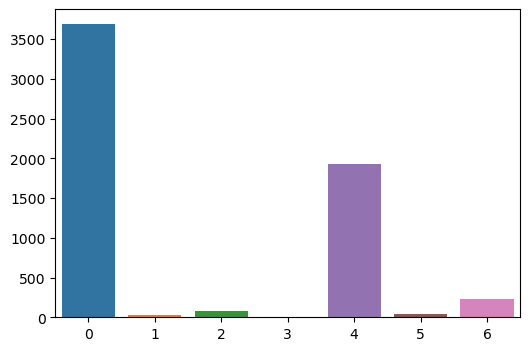

In [32]:
plt.figure(figsize=(6,4))
cluster_count=wines_drop['cluster'].value_counts()
sns.barplot(x= cluster_count.index, y=cluster_count.values)



In [33]:
wines2=pd.merge(wines_drop, wines_dropped, left_index=True, right_index=True)
wines2

,year,rating,price,body,acidity,cluster,wine,winery,country,region,type,num_reviews,year_bins
0,2013.0,4.9,995.00,5.0,3.0,5,Tinto,Teso La Monja,Espana,Toro,Toro Red,58,2010-2014
1,2018.0,4.9,313.50,4.0,2.0,2,Vina El Pison,Artadi,Espana,Vino de Espana,Tempranillo,31,2015-2019
2,2009.0,4.8,324.95,5.0,3.0,2,Unico,Vega Sicilia,Espana,Ribera del Duero,Ribera Del Duero Red,1793,2005-2009
3,1999.0,4.8,692.96,5.0,3.0,5,Unico,Vega Sicilia,Espana,Ribera del Duero,Ribera Del Duero Red,1705,1995-1999
4,1996.0,4.8,778.06,5.0,3.0,5,Unico,Vega Sicilia,Espana,Ribera del Duero,Ribera Del Duero Red,1309,1995-1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,2016.0,4.2,19.98,4.0,3.0,0,Reserva,Contino,Espana,Rioja,Rioja Red,392,2015-2019
7496,2018.0,4.2,16.76,4.0,3.0,0,Les Brugueres,Conreria d'Scala Dei,Espana,Priorato,Priorat Red,390,2015-2019
7497,2017.0,4.2,24.45,4.0,3.0,0,Finca Terrerazo,Mustiguillo,Espana,El Terrerazo,Red,390,2015-2019
7498,2011.0,4.2,64.50,5.0,3.0,4,Gran Reserva,Matarromera,Espana,Ribera del Duero,Ribera Del Duero Red,389,2010-2014


In [34]:
top_n = 10

top_n_wineries = wines2['type'].value_counts().head(top_n)
top_n_wineries = top_n_wineries.sort_values()
top_n_wineries

Grenache                  33
Rioja White               86
Mencia                   213
Albarino                 222
Toro Red                 261
Tempranillo              267
Priorat Red              620
Red                      786
Ribera Del Duero Red    1258
Rioja Red               2125
Name: type, dtype: int64

Citation:

fedesoriano. (April 2022). Spanish Wine Quality Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset